# <font color = 'orange'> Decision Tree Regressor

---

### <font color = 'Blue'> Import library, load dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
df = pd.DataFrame(dataset.data,columns = dataset.feature_names)

df['Target'] = dataset.target

# Taking a sample from the data
df = df.sample(frac = 0.25)

In [6]:
# only 25% data will be taken
df.shape

(5160, 9)

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
16136,6.1407,52.0,6.914286,1.050549,1143.0,2.512088,37.79,-122.49,5.00001
18995,4.5000,15.0,6.072115,1.014423,665.0,3.197115,38.41,-121.94,2.60900
5266,8.8619,41.0,6.123967,0.987603,617.0,2.549587,34.04,-118.55,5.00001
12008,4.1865,25.0,6.031395,1.086047,2725.0,3.168605,33.93,-117.55,1.54300
12485,1.2450,42.0,3.624254,1.125249,761.0,1.512922,38.58,-121.48,1.37500


---

### <font color = 'Blue'> 1. Segregate independent and dependent feature

In [8]:
# independent feature
x = df.iloc[:,:-1]

# dependent feature
y = df.iloc[:,-1]

---

### <font color = 'Blue'> 2. Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

# test size 33%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

---

### <font color = 'Blue'> 3. Model building

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
regressor = DecisionTreeRegressor()

In [12]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

---

### <font color = 'Blue'> 4. Prediction

In [13]:
y_pred = regressor.predict(x_test)

y_pred

array([2.183, 1.292, 3.77 , ..., 1.66 , 1.188, 4.072])

---

### <font color = 'Blue'> 5. Accuracy 

In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f'Accuracy i.e R2 score : {r2}')

Accuracy i.e R2 score : 0.4790663574399895


### <font color = '#AA00FF'> Observation :
* We can see that accuracy score 47% which is very less

---

## Hyperparameter Tuning

In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
parameters = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
    'max_features':['auto', 'sqrt', 'log2']
}

regressor = DecisionTreeRegressor()

In [22]:
# Grid Search Cross Validation
from sklearn.model_selection import GridSearchCV

regressor_cv = GridSearchCV(regressor, param_grid = parameters, cv = 2, scoring = 'neg_mean_squared_error')

In [23]:
# model training
regressor_cv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [24]:
# best parameter got from hyperparameter tuning
regressor_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

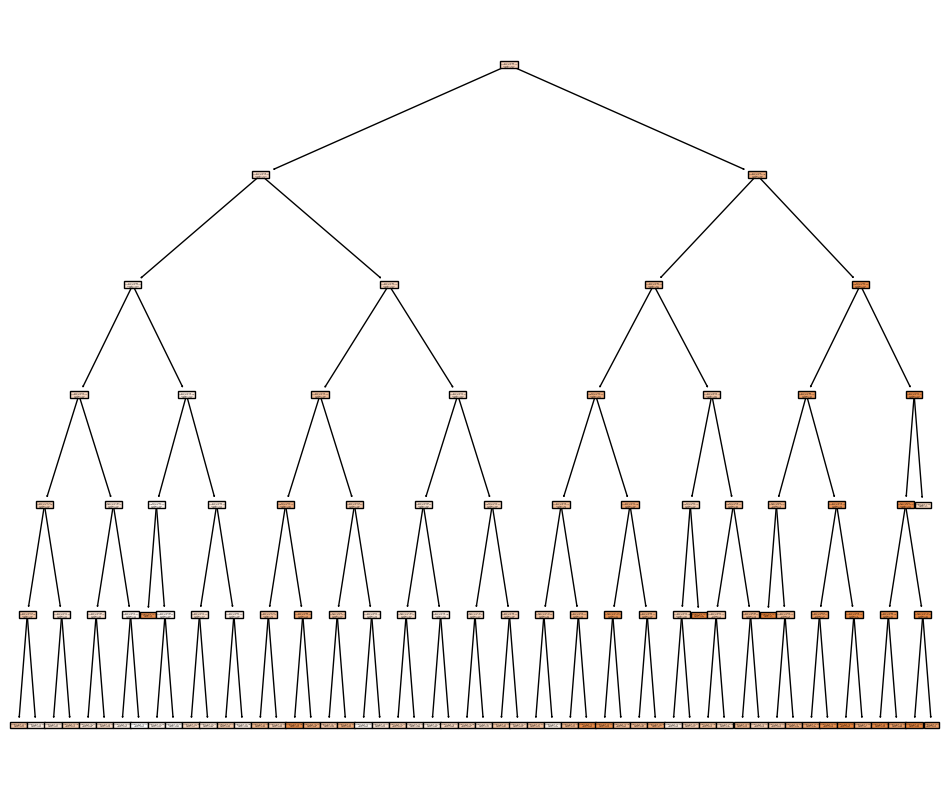

In [36]:
# to visulaize the tree

regressor = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 6, max_features = 'auto', splitter = 'best') 
regressor.fit(x_train, y_train)

from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(regressor,filled = True)
plt.show()

In [26]:
# prediction
y_pred = regressor_cv.predict(x_test)

y_pred

array([2.58723183, 2.46906283, 3.69965397, ..., 1.20633559, 1.49760345,
       3.43348576])

In [27]:
# accuracy 
r2 = r2_score(y_test, y_pred)

print(f'Accuracy i.e R2 score : {r2}')

Accuracy i.e R2 score : 0.5830540234707647


### <font color = '#AA00FF'> Observation :
* As accuracy score 58% by hyperparameter tuning we have improved accuracy

---